# Tornado Data - Clustering

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
path = r'C:\Users\lydia\OneDrive\Documents\Career Foundry Data\Data Immersion\Acheivement 6\Prepared Data'
df = pd.read_csv(os.path.join(path, 'Tornado Data.csv'), index_col = False)

In [3]:
df.head()

,Unnamed: 0,year,month,day,date,states,mag,injuries,deaths,starting lat,starting lon,ending lat,ending lon,length in miles,width in yards,wind speed,potential damage
0,0,1950,1,3,1950-01-03,Illinois,3.0,3,0,39.10,-89.30,39.12,-89.23,3.6,130,136-165 mph,Severe damage
1,1,1950,1,3,1950-01-03,Missouri,3.0,3,0,38.77,-90.22,38.83,-90.03,9.5,150,136-165 mph,Severe damage
2,2,1950,1,3,1950-01-03,Ohio,1.0,1,0,40.88,-84.58,0.00,0.00,0.1,10,85-110 mph,Moderate damage
3,3,1950,1,13,1950-01-13,Arkansas,3.0,1,1,34.40,-94.37,0.00,0.00,0.6,17,136-165 mph,Severe damage
4,4,1950,1,25,1950-01-25,Illinois,2.0,0,0,41.17,-87.33,0.00,0.00,0.1,100,111-135 mph,Considerable damage


In [4]:
df = df.drop(columns = 'Unnamed: 0')

### Cleaning and Manipulating

In [5]:
df.dtypes

year                  int64
month                 int64
day                   int64
date                 object
states               object
mag                 float64
injuries              int64
deaths                int64
starting lat        float64
starting lon        float64
ending lat          float64
ending lon          float64
length in miles     float64
width in yards        int64
wind speed           object
potential damage     object
dtype: object

In [6]:
# Removing unsuitable variables
df2 = df.drop(['year','month', 'day', 'date', 'mag', 'states', 'starting lat', 'starting lon', 'ending lat', 'ending lon', 'wind speed', 'potential damage'], axis=1)

### Standardisation

In [7]:
df2.head()

,injuries,deaths,length in miles,width in yards
0,3,0,3.6,130
1,3,0,9.5,150
2,1,0,0.1,10
3,1,1,0.6,17
4,0,0,0.1,100


In [8]:
scaler = StandardScaler()
std = scaler.fit_transform(df2)
std

array([[ 0.08472377, -0.06117029,  0.01327749,  0.11125444],
       [ 0.08472377, -0.06117029,  0.72582847,  0.2082011 ],
       [-0.02441023, -0.06117029, -0.40942225, -0.47042552],
       ...,
       [-0.07897723, -0.06117029, -0.3067666 , -0.2765322 ],
       [-0.07897723, -0.06117029, -0.08937816,  0.2082011 ],
       [ 0.24842477, -0.06117029, -0.119571  , -0.15534887]])

In [9]:
# Creating a dataframe from standardised array
column_values = ['injuries std', 'deaths std', 'length std', 'width std']

df_std = pd.DataFrame(data = std,  
                  columns = column_values)

In [10]:
df_std.head()

,injuries std,deaths std,length std,width std
0,0.084724,-0.061170,0.013277,0.111254
1,0.084724,-0.061170,0.725828,0.208201
2,-0.024410,-0.061170,-0.409422,-0.470426
3,-0.024410,0.610342,-0.349037,-0.436494
4,-0.078977,-0.061170,-0.409422,-0.034166


### The Elbow Technique

In [11]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [12]:
score = [kmeans[i].fit(df_std).score(df_std) for i in range(len(kmeans))]
score

C:\Users\lydia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lydia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lydia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lydia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lydia\anaconda3\lib\site-packages\sklearn\clust

[-268384.00000000146,
 -196852.41962677264,
 -140471.59707236424,
 -114233.27300749149,
 -94434.58593959984,
 -79586.5584402513,
 -71002.25732008465,
 -63798.61515919226,
 -58131.176069363435]

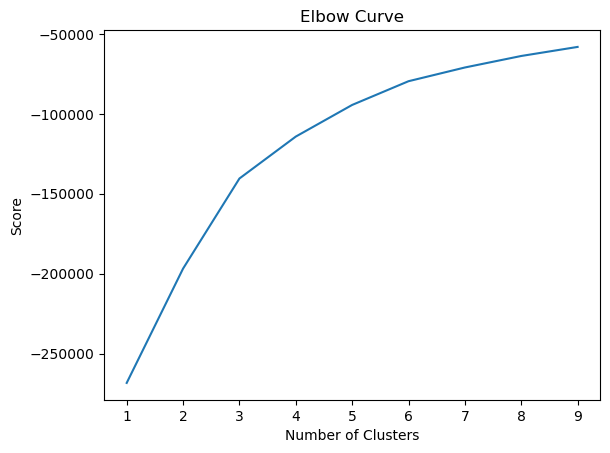

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The curve begins to smooth after 3 clusters - therefore, the optimal number of clusters is 3.

### K-means clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_std)

C:\Users\lydia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
df_std['clusters'] = kmeans.fit_predict(df_std)

C:\Users\lydia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
df_std.head()

,injuries std,deaths std,length std,width std,clusters
0,0.084724,-0.061170,0.013277,0.111254,0
1,0.084724,-0.061170,0.725828,0.208201,0
2,-0.024410,-0.061170,-0.409422,-0.470426,0
3,-0.024410,0.610342,-0.349037,-0.436494,0
4,-0.078977,-0.061170,-0.409422,-0.034166,0


In [18]:
df_std['clusters'].value_counts()

0    63065
2     3976
1       55
Name: clusters, dtype: int64

### Visualise clusters - Scatterplots

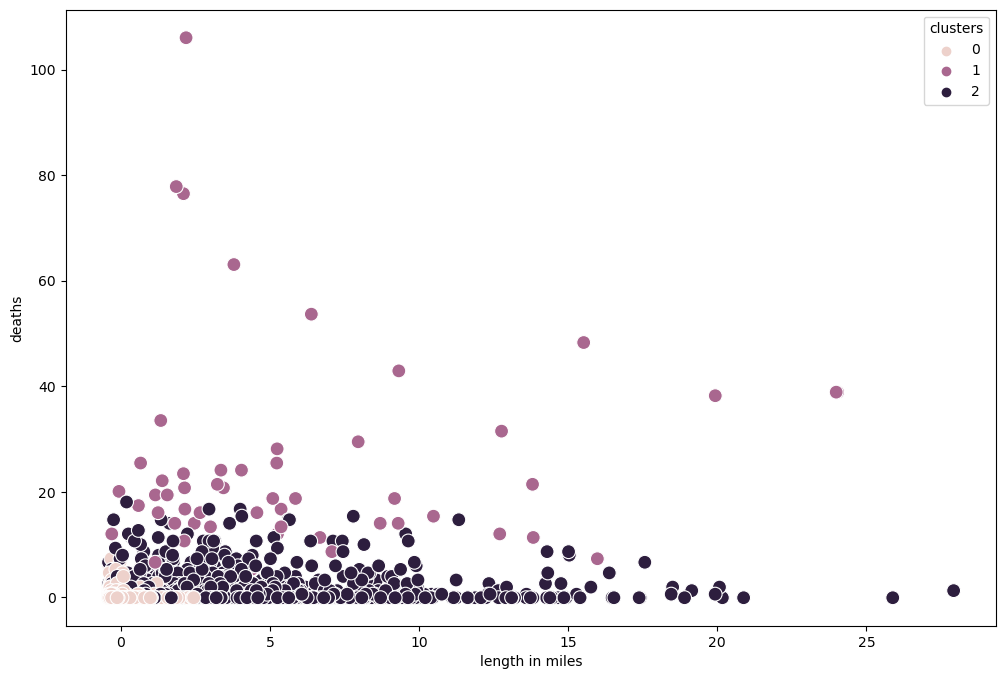

In [19]:
# Plot the clusters for the "length in miles" and "deaths" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_std['length std'], y=df_std['deaths std'], hue=df_std['clusters'], s=100) 

ax.grid(False)
plt.xlabel('length in miles') 
plt.ylabel('deaths')
plt.show()

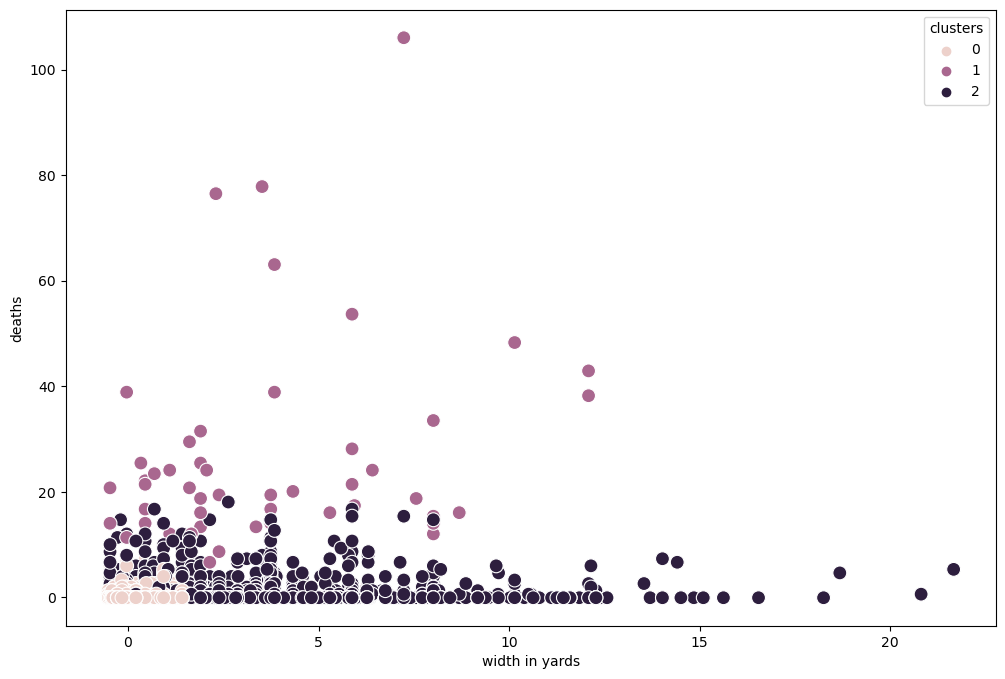

In [20]:
# Plot the clusters for the "width in yards" and "deaths" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_std['width std'], y=df_std['deaths std'], hue=df_std['clusters'], s=100) 

ax.grid(False)
plt.xlabel('width in yards') 
plt.ylabel('deaths')
plt.show()

In [21]:
# Create dataframe with clusters and lat and lon
df_join = pd.concat([df, df_std], axis=1, join = 'inner')

In [22]:
df_join.head()

,year,month,day,date,states,mag,injuries,deaths,starting lat,starting lon,...,ending lon,length in miles,width in yards,wind speed,potential damage,injuries std,deaths std,length std,width std,clusters
0,1950,1,3,1950-01-03,Illinois,3.0,3,0,39.10,-89.30,...,-89.23,3.6,130,136-165 mph,Severe damage,0.084724,-0.061170,0.013277,0.111254,0
1,1950,1,3,1950-01-03,Missouri,3.0,3,0,38.77,-90.22,...,-90.03,9.5,150,136-165 mph,Severe damage,0.084724,-0.061170,0.725828,0.208201,0
2,1950,1,3,1950-01-03,Ohio,1.0,1,0,40.88,-84.58,...,0.00,0.1,10,85-110 mph,Moderate damage,-0.024410,-0.061170,-0.409422,-0.470426,0
3,1950,1,13,1950-01-13,Arkansas,3.0,1,1,34.40,-94.37,...,0.00,0.6,17,136-165 mph,Severe damage,-0.024410,0.610342,-0.349037,-0.436494,0
4,1950,1,25,1950-01-25,Illinois,2.0,0,0,41.17,-87.33,...,0.00,0.1,100,111-135 mph,Considerable damage,-0.078977,-0.061170,-0.409422,-0.034166,0


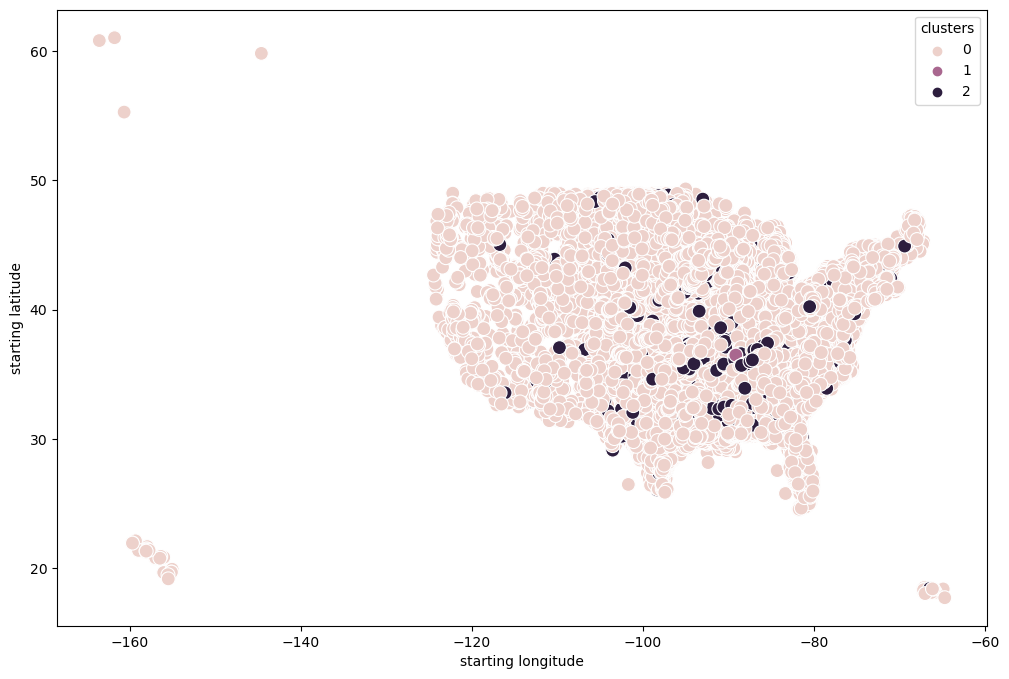

In [23]:
# Plot the clusters for the "starting lat" and "starting lon" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_join['starting lon'], y=df['starting lat'], hue=df_join['clusters'], s=100) 

ax.grid(False)
plt.xlabel('starting longitude') 
plt.ylabel('starting latitude')
plt.show()

### Observations of clusters

From the visualisations it shows that the lightest pink cluster (0) represents the smallest tornadoes with the lowest number of deaths. This is also the largest cluster and explains why, when placed on a map, it takes up the most of the visualisation. This shows that the majority of tornadoes that occur in the US are relatively small and non-destructive. The dark pink/light purple cluster (1) has the fewest number of tornadoes and seems to represent those with a higher number of deaths. Finally, the dark purple cluster (2) seems to show tornadoes that are larger (have bigger lengths and widths) but are relatively non-destructive in that they do not cause many deaths.

### Descriptive statistics

In [24]:
#create a column that renames the clusters to colors 
df_join.loc[df_join['clusters'] == 2, 'cluster'] = 'dark purple'
df_join.loc[df_join['clusters'] == 1, 'cluster'] = 'dark pink'
df_join.loc[df_join['clusters'] == 0, 'cluster'] = 'light pink'

In [25]:
df_join.groupby('cluster').agg({
    'deaths':['mean','median'],
    'length in miles':['mean','median'],
    'width in yards':['mean','median']
})

deaths        length in miles         width in yards       
                  mean median            mean  median           mean median
cluster                                                                    
dark pink    37.236364   29.0       53.213273  37.000     859.854545  600.0
dark purple   0.743209    0.0       23.210724  17.395     658.583501  600.0
light pink    0.017585    0.0        2.203386   0.520      71.619662   40.0

The descriptive statistics confirm the grouping observations stated above. To highlight in particular, the dark purple refers to larger tornadoes with a low number of deaths, the dark pink cluster refers to the most destructive tornadoes, and the light pink refers to the smallest, non-destructive tornadoes.

### Future Steps

It would be interesting to do further analysis on the states/location to assess how the clusters correspond with the location data. This could provide us with further insights on the types of tornadoes occurring in different areas in the US.

### Export df_join

In [26]:
df_join.to_csv(os.path.join(path, 'Tornado Cluster.csv'))